# Assignment 2 - Natalie Seah
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

I would define the most profitable item as the item that has the largest total profit across all sales, not just per-unit profit. This is because a liquor that sells thousands of bottles with a smaller markup can generate more total profit than one that sells only a few bottles with a high markup.

So formula wise, whatever item has the highest total profit when Total Profit = (State Bottle Retail−State Bottle Cost) * Bottles Sold


                                       total_profit
Item Description                                   
TITOS HANDMADE VODKA                      364074.35
BLACK VELVET                              274676.85
FIREBALL CINNAMON WHISKEY                 187535.22
CROWN ROYAL                               160981.95
CROWN ROYAL REGAL APPLE                   122880.40
CAPTAIN MORGAN SPICED RUM                 121115.30
HAWKEYE VODKA                             116375.04
CAPTAIN MORGAN ORIGINAL SPICED            112146.71
JACK DANIELS OLD #7 BLACK LABEL           111509.09
HENNESSY VS                               108459.45
JAMESON                                   101178.98
JACK DANIELS OLD #7 BLACK LBL              93151.76
JAGERMEISTER LIQUEUR                       83029.62
JIM BEAM                                   80760.14
CROWN ROYAL CANADIAN WHISKY                68448.06
PATRON SILVER                              65958.25
ABSOLUT SWEDISH VODKA 80 PRF               63313.57
FIVE O'CLOCK

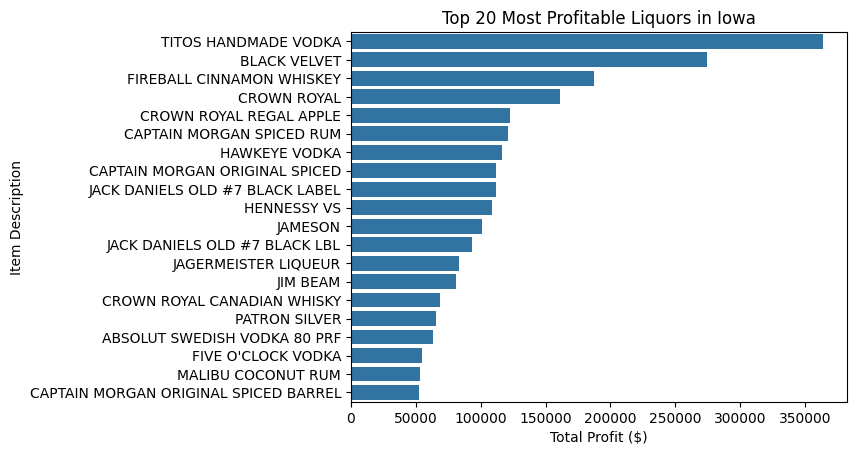

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iowa = pd.read_csv("data/iowa.csv")

df = iowa.copy()
df["profit_per_bottle"] = df["State Bottle Retail"] - df["State Bottle Cost"]
df["total_profit"] = df["profit_per_bottle"] * df["Bottles Sold"]

profits = (df.loc[:, ['total_profit','Item Description']]
              .groupby('Item Description')
              .sum()
              .sort_values(by='total_profit', ascending=False))

top_profits = profits[:20]
print(top_profits)


sns.barplot(
    x = top_profits['total_profit'],
    y = top_profits.index,
    orient = 'h'
)
plt.title("Top 20 Most Profitable Liquors in Iowa")
plt.xlabel("Total Profit ($)")
plt.ylabel("Item Description")
plt.show()


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [2]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

x-y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

When I tried to subtract the 2 vectors x and y, I got a ValueError saying that the operands could not be broadcast together with shapes (3,) (2,) 

In [4]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

x.reshape(-1,1) - y.reshape(1,-1) turns x into a column vector of shape (3,1) and y into a row vector of shape (1,2). I get a 3x2 matrix with 3 rows and 2 columns, where each entry (i,j) is x[i] - y[j].

In [5]:
x.reshape(1,-1) - y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

x.reshape(1,-1) - y.reshape(-1,1) turns x into a row vector with 1 row and 3 columns and y into a column vector with 2 rows and 1 column. While the code snippet before produced a 3x2 matrix with 3 rows and 2 columns, x.reshape(1,-1) - y.reshape(-1,1)produced a 2x3 matrix with 2 rows and 3 columns. In the previous code, each entry (i,j) was x[i]-y[j] but in this case, each entry (i,j) is x[j]-y[i].

In [ ]:
#To replicate x.reshape(-1,1) - y.reshape(1,-1)
ex1 = np.zeros((len(x), len(y)), dtype=int)
for i in range(len(x)):
    for j in range(len(y)):
        ex1[i,j] = x[i] - y[j]

ex1

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [9]:
#To replicate x.reshape(1,-1) - y.reshape(-1,1)
ex2 = np.zeros((len(y), len(x)), dtype=int)
for i in range(len(y)):
    for j in range(len(x)):
        ex2[i,j] = x[j] - y[i]
        
ex2

array([[-1,  1,  3],
       [-4, -2,  0]])

x.reshape(1,-1) changes an array x by forcing the array into 1 row and then however many columns necessary. In this specific case where x = np.array([1,3,5]), x was forced into a row vector with 3 columns, [[1, 3, 5]]. x.reshape(-1,1) changes an array x by forcing the array into 1 column and however many rows necessary. For this example, where x = np.array([1,3,5]). x was forced into a column vector with 3 rows [[1],
 [3],
 [5]].

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

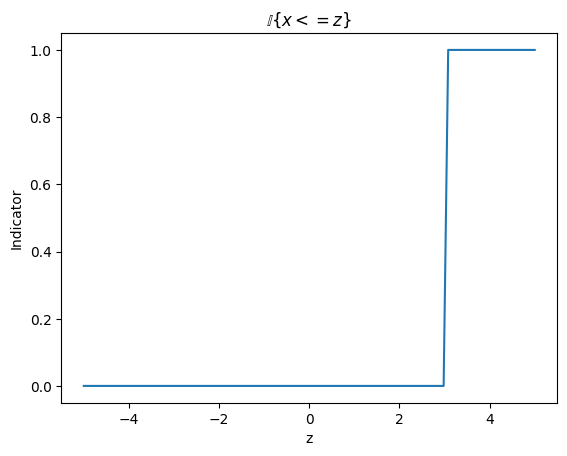

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

grid = np.linspace(-5, 5, 100)

def ind_ls(x, grid):
    return (x <= grid).astype(int)

x = 3

sns.lineplot(x=grid, y=ind_ls(x, grid)).set(title='$\\mathbb{I}\\{x <= z\\}$')
plt.xlabel('z')
plt.ylabel('Indicator')
plt.show()

#Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$.

Because I{x ≤ z} is an indicator function that takes on the value 1 if the condition x ≤ z is true, and 0 when x > z, if we multiply I{x ≤ z} by -1, we get that -I{x ≤ z} takes on the value -1 if x ≤ z and 0 when x > z. Adding 1 to both sides, 1-I{x ≤ z} now equals 1 when x > z and 0 when x ≤ z. This is exactly the definition of I{x>z}. Using the logic that pr[A] is the probability that A occurs and the probability of “not A” is 1-pr[A], I{x ≤ z} can be thought of the event that x ≤ z occurs so 1-I{x ≤ z} represents the event not x ≤ z, which is the same as x>z. This is because when you negate an inequality like ≤ it becomes >. Thus 1−I{x≤z}=I{x>z}.


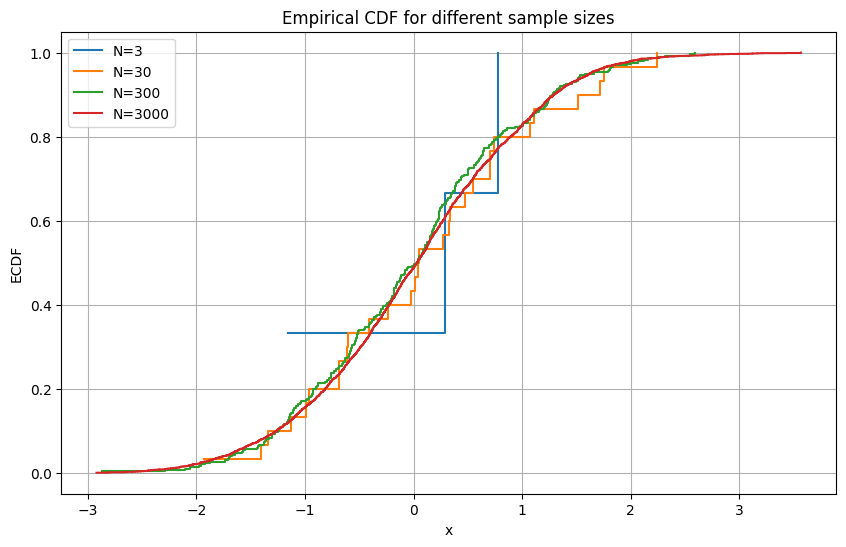

In [14]:
rng = np.random.default_rng(100)

def ecdf(x):
    """Compute x's ECDF."""
    x_sorted = np.sort(x)
    n = len(x)
    y = np.arange(1, n+1) / n
    return x_sorted, y


plt.figure(figsize=(10,6))
for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    x_sorted, y_ecdf = ecdf(X)
    plt.step(x_sorted, y_ecdf, where='post', label=f'N={N}')
    
plt.xlabel('x')
plt.ylabel('ECDF')
plt.title('Empirical CDF for different sample sizes')
plt.legend()
plt.grid(True)
plt.show()


Qualitatively, as the sample size N increases, the ECDFs go from looking very jumpy and jagged to looking more and more smooth. This seems to demonstrate that the ECDF starts to resemble the true CDF more and more as the sample size increases.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [15]:
import math
def compute_quantile(data, q):
    sorted_data = sorted(data)
    n = len(sorted_data)
    pos = q * (n - 1)
    lower = int(math.floor(pos))
    upper = int(math.ceil(pos))
    
    if lower == upper:
        return sorted_data[lower]
    else:
        return sorted_data[lower] + (pos - lower) * (sorted_data[upper] - sorted_data[lower])

In [16]:
def compute_IQR_whiskers(data):
    q1 = compute_quantile(data, 0.25)
    q3 = compute_quantile(data, 0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return q1, q3, iqr, lower_whisker, upper_whisker

In [17]:
def five_number_summary(data):
    sorteddata = sorted(data)
    q1, q3, iqr, lw, uw = compute_IQR_whiskers(sorteddata)
    
    summary = {
        "min": np.min(sorteddata),
        "Q1": q1,
        "median": compute_quantile(sorteddata, 0.5),
        "Q3": q3,
        "max": np.max(sorteddata),
        "IQR": iqr,
        "lower_whisker": lw,
        "upper_whisker": uw
    }
    return summary

In [18]:
def detect_outliers(data):
    results = compute_IQR_whiskers(data)
    lw, uw = results[3], results[4]
    return (data < lw) | (data > uw)

In [19]:
data = df["Bottle Volume (ml)"].values

summary = five_number_summary(data)
outliers = detect_outliers(data)

summary = five_number_summary(data)
outliers = detect_outliers(data)

print("Five-number summary & whiskers (my function):")
for k, v in summary.items():
    print(f"{k}: {v}")

print("\nNumber of outliers detected:", np.sum(outliers))

print("\ndf.describe:")
print(df["Bottle Volume (ml)"].describe())

Five-number summary & whiskers (my function):
min: 20
Q1: 750.0
median: 750.0
Q3: 1000.0
max: 6000
IQR: 250.0
lower_whisker: 375.0
upper_whisker: 1375.0

Number of outliers detected: 47884

df.describe:
count    159904.000000
mean        869.592737
std         513.812818
min          20.000000
25%         750.000000
50%         750.000000
75%        1000.000000
max        6000.000000
Name: Bottle Volume (ml), dtype: float64


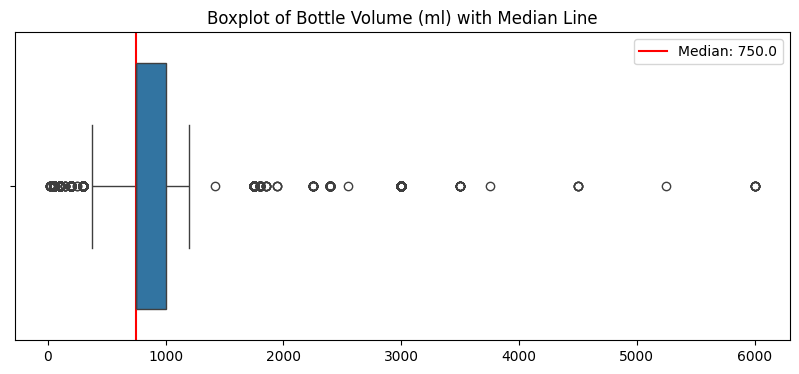

In [20]:
median_value = iowa["Bottle Volume (ml)"].describe()["50%"] 

plt.figure(figsize=(10, 4))
sns.boxplot(x=data)
plt.axvline(median_value, color='red',label=f"Median: {median_value}")
plt.title("Boxplot of Bottle Volume (ml) with Median Line")
plt.legend()
plt.show()

Comparing my answers with df.describe, 
it looks like everything lines up. The Q1, median, Q3, min, and max from my function match with the 25%, 50%, and 75% that df.describe output. The IQR (Q3-Q1) from my function is also consistent with what using the values from df.describe results in. These values also match up with what was output by sns.boxplot, where the median is the same as Q1.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

In [ ]:
##UNFINISHED
def gaussian_kernel(u):
    return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)

def epanechnikov_kernel(u):
    mask = np.abs(u) <= 1 #use to zero out values outside of [-1,1]
    k = np.zeros_like(u)
    k[mask] = 0.75 * (1 - u[mask]**2)
    return k

def uniform_kernel(u):
    return 0.5 * (np.abs(u) <= 1)

def triangular_kernel(u):
    mask = np.abs(u) <= 1
    k = np.zeros_like(u)
    k[mask] = 1 - np.abs(u[mask])
    return k

In [ ]:
def kde(x, h, kernel='gaussian', plot=True):
    Z = np.linspace(np.min(x), np.max(x), 200)  
    data = x.to_numpy().reshape(-1,1)
    
    kernels = {
        'gaussian': gaussian_kernel,
        'epanechnikov': epanechnikov_kernel,
        'uniform': uniform_kernel,
        'triangular': triangular_kernel
    }
    k_func = kernels.get(kernel, gaussian_kernel)
    
    # Compute KDE
    U = (data - Z) / h
    K_values = k_func(U)
    f_hat = np.mean(K_values, axis=0) / h
    
    if plot:
        plt.figure(figsize=(7,5))
        plt.plot(Z, f_hat, label=f'{kernel}, h={h:.2f}')
        sns.rugplot(x, alpha=0.1)
        plt.title(f'KDE of {x.name}')
        plt.xlabel(x.name)
        plt.ylabel('Density')
        plt.legend()
        plt.show()
    
    return f_hat, Z

In [ ]:
def plug_in_bandwidth(x):
    n = len(x)
    std_x = np.std(x)
    iqr = np.quantile(x, 0.75) - np.quantile(x, 0.25)
    h = 0.9 * min(std_x, iqr / 1.34) * n**(-1/5)
    return h

In [ ]:
##FIX
x = college['student_count'].dropna()

h_opt = plug_in_bandwidth(x)
print(f"Plug-in bandwidth: {h_opt:.2f}")

bandwidths = [h_opt/2, h_opt, h_opt*2]
labels = ['Small (Overfitting)', 'Plug-in', 'Large (Underfitting)']

plt.figure(figsize=(8,5))
for h, label in zip(bandwidths, labels):
    f_hat, Z = kde(x, h)
    plt.plot(Z, f_hat, label=f"{label}, h={h:.2f}")

sns.rugplot(x, alpha=0.1)
plt.title('KDE of Student Count - Gaussian Kernel')
plt.xlabel('Student Count')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x = college['student_count'].dropna()
plt.hist(x, bins=30, edgecolor='k')
plt.title('Histogram of Student Count')
plt.xlabel('Student Count')
plt.ylabel('Frequency')
plt.show()